<a href="https://colab.research.google.com/github/Rashida-Rangwala/ZeeRecommenderSystem/blob/main/Zee_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

Data Dictionary:

RATINGS FILE DESCRIPTION

=========================================================================

All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp

UserIDs range between 1 and 6040

MovieIDs range between 1 and 3952

Ratings are made on a 5-star scale (whole-star ratings only)

Timestamp is represented in seconds

Each user has at least 20 ratings

USERS FILE DESCRIPTION

=========================================================================

User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is not checked for accuracy.
Only users who have provided some demographic information are included in this data set.

Gender is denoted by a "M" for male and "F" for female

Age is chosen from the following ranges:

1: "Under 18"

18: "18-24"

25: "25-34"

35: "35-44"

45: "45-49"

50: "50-55"

56: "56+"

Occupation is chosen from the following choices:

0: "other" or not specified

1: "academic/educator"

2: "artist"

3: "clerical/admin"

4: "college/grad student"

5: "customer service"

6: "doctor/health care"

7: "executive/managerial"

8: "farmer"

9: "homemaker"

10: "K-12 student"

11: "lawyer"

12: "programmer"

13: "retired"

14: "sales/marketing"

15: "scientist"

16: "self-employed"

17: "technician/engineer"

18: "tradesman/craftsman"

19: "unemployed"

20: "writer"

MOVIES FILE DESCRIPTION

=========================================================================

Movie information is in the file "movies.dat" and is in the following format:

MovieID::Title::Genres

Titles are identical to titles provided by the IMDB (including year of release)

Genres are pipe-separated and are selected from the following genres:

Action

Adventure

Animation

Children's

Comedy

Crime

Documentary

Drama

Fantasy

Film-Noir

Horror

Musical

Mystery

Romance

Sci-Fi

Thriller

War

Western

**Concepts covered**

Recommender Engine

Collaborative Filtering (Item-based & User-based Approach)

Pearson Correlation

Nearest Neighbors using Cosine Similarity

Matrix Factorization

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install chardet
import chardet

# Detect the encoding of the file
with open("zee-movies.dat", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

# Read the file with the detected encoding
df_movies = pd.read_csv("zee-movies.dat", encoding=encoding, sep="::")

# Print the head of the DataFrame
df_movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Read the file with the detected encoding
df_users = pd.read_csv("zee-users.dat", encoding=encoding, sep="::")

# Print the head of the DataFrame
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
# Read the file with the detected encoding
df_ratings = pd.read_csv("zee-ratings.dat", encoding=encoding, sep="::")

# Print the head of the DataFrame
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


from matplotlib import pyplot as plt
_df_0['MovieID'].plot(kind='hist', bins=20, title='MovieID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Timestamp'].plot(kind='hist', bins=20, title='Timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='MovieID', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Rating', y='Timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['UserID']
  ys = series['MovieID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('UserID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('UserID')
_ = plt.ylabel('MovieID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['UserID']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('UserID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('UserID')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['UserID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'UserID'}, axis=1)
              .sort_values('UserID', ascending=True))
  xs = counted['UserID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('UserID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('UserID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['MovieID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('MovieID')

from matplotlib import pyplot as plt
_df_9['MovieID'].plot(kind='line', figsize=(8, 4), title='MovieID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Timestamp'].plot(kind='line', figsize=(8, 4), title='Timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie ID  3883 non-null   int64 
 1   Title     3883 non-null   object
 2   Genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


There are no missing values in all the 3 given datasets.

Encoding Gender :- Female : 0 and Male : 1

<Axes: xlabel='count', ylabel='Gender'>

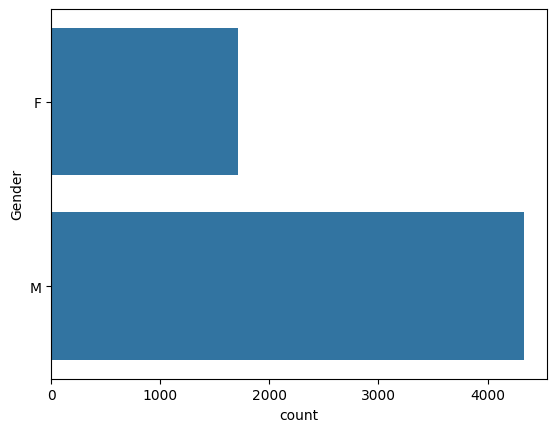

In [ ]:
import seaborn as sns

sns.countplot(df_users["Gender"])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the "gender" column
df_users['Gender'] = le.fit_transform(df_users['Gender'])

df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455


In [ ]:
df_users["Gender"].value_counts()

1    4331
0    1709
Name: Gender, dtype: int64

# **Feature Engineering**

Movies dataset - Extracting Year from Title column

In [ ]:
df_movies["Title"].iloc[-5:]

3878       Meet the Parents (2000)
3879    Requiem for a Dream (2000)
3880              Tigerland (2000)
3881       Two Family House (2000)
3882         Contender, The (2000)
Name: Title, dtype: object

In [ ]:
# Define a function to extract title and year
def extract_title(x):
    # Split the string at the last open parenthesis
    title, year = x.rsplit('(', 1)
    # Remove trailing closing parenthesis from year
    year = year[:-1]
    return title.strip()

def extract_year(x):
    # Split the string at the last open parenthesis
    title, year = x.rsplit('(', 1)
    # Remove trailing closing parenthesis from year
    year = year[:-1]
    return int(year)

# Apply the function to the 'movie' column and create new columns
df_movies['Title_New'] = df_movies['Title'].apply(extract_title)


In [ ]:
df_movies['ReleaseYear'] = df_movies['Title'].apply(extract_year)

In [ ]:
df_movies.head()

,Movie ID,Title,Genres,Title_New,ReleaseYear
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995


In [ ]:
# Define the bin edges (inclusive on the left, exclusive on the right)
bins = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
# Define bin labels
labels = ['50\'s','60\'s','70\'s', '80\'s', '90\'s', '00\'s']

# Create categories using cut
df_movies['decade'] = pd.cut(df_movies['ReleaseYear'], bins=bins, labels=labels)

# Print the DataFrame
df_movies.head(20)

,movieID,Title,Genres,Title_New,ReleaseYear,decade
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995,90's
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995,90's
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995,90's
3,4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,1995,90's
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995,90's
5,6,Heat (1995),Action|Crime|Thriller,Heat,1995,90's
6,7,Sabrina (1995),Comedy|Romance,Sabrina,1995,90's
7,8,Tom and Huck (1995),Adventure|Children's,Tom and Huck,1995,90's
8,9,Sudden Death (1995),Action,Sudden Death,1995,90's
9,10,GoldenEye (1995),Action|Adventure|Thriller,GoldenEye,1995,90's


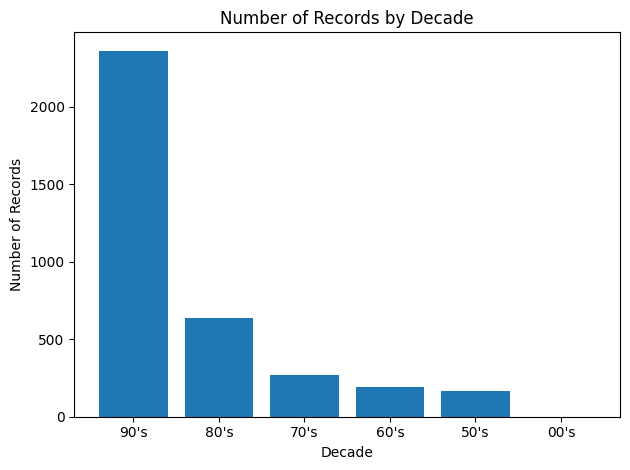

In [ ]:
import matplotlib.pyplot as plt
decade_counts = df_movies['decade'].value_counts()

# Create a bar chart
plt.bar(decade_counts.index, decade_counts.values)
plt.xlabel('Decade')
plt.ylabel('Number of Records')
plt.title('Number of Records by Decade')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
df_movies.rename(columns= {'Movie ID': 'movieID'},  inplace=True)

In [ ]:
df_ratings.rename(columns= {'MovieID': 'movieID'}, inplace=True)

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   movieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movieID      3883 non-null   int64 
 1   Title        3883 non-null   object
 2   Genres       3883 non-null   object
 3   Title_New    3883 non-null   object
 4   ReleaseYear  3883 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 151.8+ KB


In [ ]:
select_movies = df_ratings.movieID.value_counts().head(1000).index.to_list() # ratings of top 1000 movies
movies = df_movies.loc[df_movies.movieID.isin(select_movies)] # filtering if the movie is in top 1000 movies
ratings = df_ratings.loc[df_ratings.movieID.isin(select_movies)] # ratings for top 1000 movies

### Transforming Movie Genres into Binary Features
- We are transforming the data in this manner to prepare it for use in recommendation system.
- By representing genres as binary features (1 for belonging to a genre and 0 for not), we create a structured dataset that is more suitable for training recommendation models.
- This transformation simplifies the data and allows us to quantify the presence or absence of specific genres for each movie, making it easier to identify genre preferences and similarities among users and movies.

In [ ]:
# Sparse matrix

m = movies.copy()
m['Genres'] = m['Genres'].str.split('|')
m = m.explode('Genres')
m = m.pivot(index='movieID', columns='Genres', values='Title')
m = ~m.isna()
m = m.astype(int)
m.head(2)

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Extracting Hour from Timestamp

 - Extracting the hour from the timestamp can indeed serve as a valuable user feature.
 - By incorporating the hour of the day when users provide ratings, it provides a means to capture time-based patterns and behaviors of users.

In [ ]:
r = ratings.copy()

In [ ]:
r['hour'] = r['Timestamp'].apply(lambda x: datetime.fromtimestamp(x).hour)
r.head()

,UserID,movieID,Rating,Timestamp,hour
0,1,1193,5,978300760,22
1,1,661,3,978302109,22
2,1,914,3,978301968,22
3,1,3408,4,978300275,22
4,1,2355,5,978824291,23


- Merging user data with aggregated statistics from ratings.
- It adds features for each user's average rating and the average hour of rating submission, enhancing user profiles for recommendation systems.

In [ ]:
df_users = df_users.merge(r.groupby('UserID').Rating.mean().reset_index(), on='UserID')
df_users = df_users.merge(r.groupby('UserID').hour.mean().reset_index(), on='UserID')
df_users.head(2)

,UserID,Gender,Age,Occupation,Zip-code,Rating,hour
0,1,0,1,10,48067,4.180000,22.240000
1,2,1,56,16,70072,3.714286,21.159664


Now we have created the user-user similarity matrix and item-item similarity matrix, which is movie genre data.

## How can we use this information to build the regressor?

> We know that **rating** is our target variable.

### What should be our features?

**users:** userId, age, time_spent_per_day, avg_hour, avg_rating

**ratings:** movie_id

**movies:** Action, Adventure, Animation, Children, Comedy, Crime, Documentary,	Drama, Fantasy, Film-Noir, Horror, IMAX, Musical, Mystery, Romance, Sci-Fi,	Thriller,	War	Western

We'll use the above features from the respective data to build the regressor model.

Before that Let's Rescale the data

In [ ]:
df_users.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code', 'Rating', 'hour'], dtype='object')

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UserID      6040 non-null   int64  
 1   Gender      6040 non-null   int64  
 2   Age         6040 non-null   int64  
 3   Occupation  6040 non-null   int64  
 4   Zip-code    6040 non-null   object 
 5   Rating      6040 non-null   float64
 6   hour        6040 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 377.5+ KB


We can drop the Zip code column from the Users dataset as that won't affect the model as such and is the only Object type data found.

In [ ]:
df_users.drop("Zip-code",axis=1, inplace = True)

In [ ]:
df_users["Occupation"].value_counts()

4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: Occupation, dtype: int64

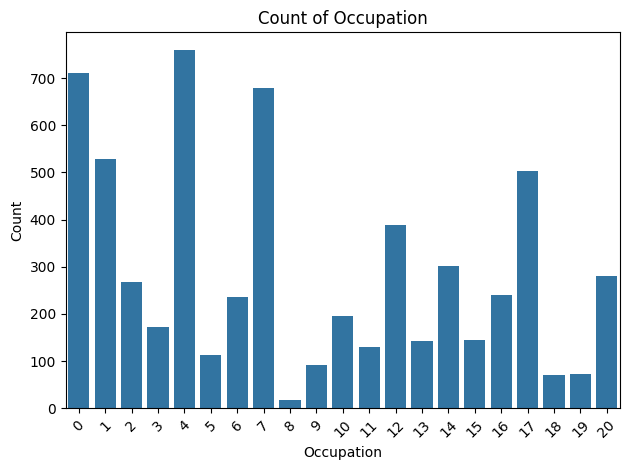

In [ ]:
# Create a countplot
sns.countplot(x='Occupation', data=df_users)

# Customize the plot (optional)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Occupation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

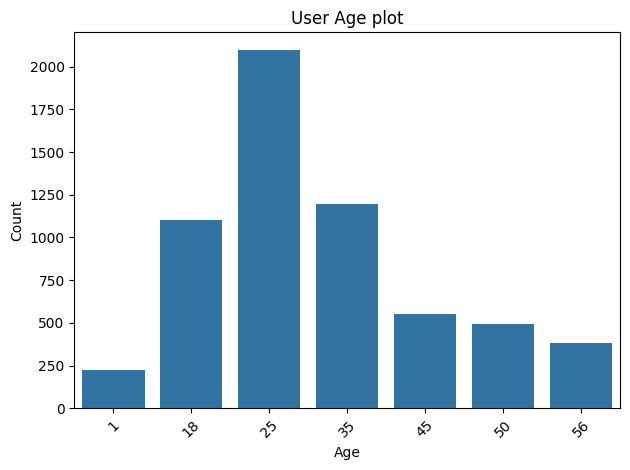

In [ ]:
# Create a countplot
sns.countplot(x='Age', data=df_users)

# Customize the plot (optional)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('User Age plot')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
u = df_users.copy()
u = u.set_index('UserID')
u.columns = ['Age', 'Gender','Occupation', 'Rating', 'hour']

scaler = StandardScaler()
u = pd.DataFrame(scaler.fit_transform(u), columns=u.columns, index=u.index)
u.head(2)

,Age,Gender,Occupation,Rating,hour
UserID,,,,,
1,-1.591927,-2.298525,0.292803,0.951317,1.409648
2,0.628170,1.966729,1.240822,-0.177791,1.258746


# **REGRESSION BASED RECOMMENDATION SYSTEM**

In [ ]:
m.head()

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
u.head()

,Age,Gender,Occupation,Rating,hour
UserID,,,,,
1,-1.591927,-2.298525,0.292803,0.951317,1.409648
2,0.628170,1.966729,1.240822,-0.177791,1.258746
3,0.628170,-0.437323,1.082819,0.363384,1.236444
4,0.628170,1.113678,-0.181207,0.976716,1.096764
5,0.628170,-0.437323,1.872834,-1.354331,-0.865160


 ### Creating Final Feature Matrix

 - Creating a merged DataFrame **X** by combining user and movie data with their respective ratings.
 - Selecting columns **movieId**, **userId**and **rating** from the ratings dataset, then merges this data with user information and movie information based on **userId** and **movieId** respectively.
 - The result is a combined dataset that includes user and movie attributes along with their ratings, providing a comprehensive basis for building recommendation models.

In [ ]:
X = ratings[['movieID', 'UserID', 'Rating']].copy()
X = X.merge(u.reset_index(), on='UserID', how='right')
X = X.merge(m.reset_index(), on='movieID', how='right')
X.head()

,movieID,UserID,Rating_x,Age,Gender,Occupation,Rating_y,hour,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,5,-1.591927,-2.298525,0.292803,0.951317,1.409648,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,6,4,-1.591927,1.501429,0.134800,0.290426,-1.130363,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,8,4,0.628170,-0.437323,0.608809,0.536954,-1.395897,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,9,5,0.628170,-0.437323,1.398825,0.065013,-1.557164,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,10,5,-1.591927,0.338177,-1.129226,0.892556,-0.708203,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = X.drop(columns = ['movieID', 'UserID'])
y = X.pop('Rating_x')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Building Regression Model**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

MSE is a better choice for recommendation systems with discrete and bounded ratings

In [ ]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_pred)**0.5

0.968016102740142

This is a great score. Let's see if we can get even more or not.

## Does Cold start problem occur with this model?

Can we still predict the ratings even if new user and movie is added?

Yes, Because some user based information is required like **Rating_Y** and **Hour**

Ratings for User 1

In [ ]:
ratings.loc[ratings.UserID==1].head()

,UserID,movieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Predicting the rating for USER 1 Movie 1

In [ ]:
model.predict(u.loc[1].append(m.loc[1]).values.reshape(1,-1))

array([4.32265638])

If we compare the actual with predicted rating - Actual is 5 and predicted is 4.32 in this case.

We are close to the actual rating but still there is a lot of room for improvement

We have built a regression model to predict the rating based on user and movie features. But it is not the efficient method for recommendation system due to:

- **Data Sparsity:**
 - Recommender systems often deal with sparse user-item interaction data.
 - Regression models require data for each user-item pair to make predictions
 - However, most users have not interacted with most items, leading to a lack of data for training the model for many user-item pairs.
 - This can result in a high number of missing values in the dataset, making it challenging for regression models to generalize effectively.

- **Cold Start Problem:** Regression models struggle with the "cold start problem," where new users or items with limited interaction history are introduced to the system.

- **Limited Latent Factor Capture:**
 - Regression models rely solely on explicit user and item features to make predictions.
 - They may not effectively capture latent factors or hidden patterns that significantly influence user-item interactions.
 - This can result in less accurate recommendations compared to matrix factorization, which inherently captures latent factors.

## How can we solve this problem?

## Collaborative Filtering

- **Collaborative filtering** is a recommendation methodology designed to automatically make predictions (filtering) about a user's interests by aggregating and analyzing preferences from a collective of users (collaborating).
- The core idea behind this approach is that users who have shared preferences in the past are likely to have shared preferences in the future.

- If 2 users like the same movies, they are similar.
- If 2 ovies are liked by the same users, they are similar.

Note, that instead of "2", similarity is approximated by as many data points as possbible.
popular movies maybe liked by everyone, does not mean that they are similar.

> this is hard to achieve because there are simultaneous interactions

One techinque to achive this, while dealing with sparsity is called **Matrix Factorisation**

## What is Matrix Factorization?

- **Matrix factorization** is a mathematical technique commonly used in recommendation systems to factorize a user-item interaction matrix into lower-dimensional matrices representing users and items.
- The core concept behind matrix factorization is to approximate the original matrix by decomposing it into two or more matrices.
- This process helps uncover latent factors that influence user-item interactions.


In [ ]:
rm = ratings.pivot(index = 'UserID', columns ='movieID', values = 'Rating').fillna(0)
rm.head()

movieID,1,2,3,6,7,10,11,16,17,19,...,3863,3868,3869,3893,3897,3911,3916,3927,3948,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
(rm > 0).sum().sum() / (rm.shape[0] * rm.shape[1])

0.12381937086092715

- Only 12.3% of the values are filled

### Using cmfrec library

### Collective matrix factorisation for recommender systems

- **cmfrec** library requires input in the form of dataframe not as sparse matrix.

- It required 3 columns UserId, ItemId, Rating.



In [ ]:
rm_raw = ratings[['UserID', 'movieID', 'Rating']].copy()
rm_raw.columns = ['UserId', 'ItemId', 'Rating']  # Lib requires specific column names
rm_raw.head(2)

,UserId,ItemId,Rating
0,1,1193,5
1,1,661,3


In [ ]:
!pip install cmfrec


from cmfrec import CMF

model = CMF(method="als", k=2, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(rm_raw)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.4/268.4 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached findblas-0.1.23-py3-none-any.whl
  Created wheel for cmfrec: filename=cmfrec-3.5.1.post8-cp310-cp310-linux_x86_64.whl size=5830765 sha256=da6c8eb0f16935ad46015bb399556853302ab6a8fd5ad59e2fdb609be55ea8f1
  Stored in directory: /root/.cache/pip/wheels/e0/71/0d/01436e6fcdeded3e169a45fcd8364ffe4991cc4deabf30b37d
Successfully built cmfrec


Collective matrix factorization model
(explicit-feedback variant)


In [ ]:
model.A_.shape, model.B_.shape

((6040, 2), (1000, 2))

In [ ]:
rm_raw.Rating.mean(), model.glob_mean_

(3.7055767788208898, 3.7055768966674805)

In [ ]:
rm__ = np.dot(model.A_, model.B_.T) + model.glob_mean_
mse(rm.values[rm > 0], rm__[rm > 0])**0.5

1.128390975048008

## How to Measure performance of the Recommendation system?

- **MSE** can be used when you have to compare between the actual and predicted ratings.

- But in case of recommendation system, where we find the similarity between the embeddings, it is not possible to measure **MSE**.

- In this case, we can use a metric called **Overlap**


### What is Overlap?

- Overlap is a metric that quantifies the commonality between the set of items recommended to a user and the set of items the user has interacted with or rated positively.
- A higher overlap indicates that the recommendations align more closely with the user's interests, suggesting a more effective recommendation system.

<center><img src = "https://drive.google.com/uc?id=1V8CVGX2RfZHTux67c1G5F_yHPqhEs3Hk"></center>

**Example:**
Let's consider a scenario where a user, Sarah, is using a movie recommendation system. Sarah has rated and interacted with several movies, and the system aims to recommend new movies based on her preferences.

- Sarah has interacted with five movies: A, B, C, D, and E. These are the movies she has watched, rated, or liked.

- The recommendation system generates a list of ten movie recommendations for Sarah. These recommendations are labeled as 1, 2, 3, 4, 5, 6, 7, 8, 9, and 10.

- To calculate the overlap, we compare the recommended movies (1 to 10) with the movies Sarah has interacted with (A to E).

Let's see which recommended movies overlap with Sarah's interactions:

- **Overlap:** Movies A, B, and D are part of Sarah's interactions and are also recommended (3 out of 10).

- **Non-Overlap:** Movies C and E are not part of the recommendations.

The overlap metric is calculated as the number of overlapping items divided by the total number of recommended items.

> In this case, the overlap metric is 3 (overlapping movies) / 10 (total recommended movies) = 0.3 or 30%.

In [ ]:
top_items = model.topN(user=1, n=10)
movies.loc[movies.movieID.isin(top_items)]

,movieID,Title,Genres,Title_New,ReleaseYear
360,364,"Lion King, The (1994)",Animation|Children's|Musical,"Lion King, The",1994
549,553,Tombstone (1993),Western,Tombstone,1993
591,595,Beauty and the Beast (1991),Animation|Children's|Musical,Beauty and the Beast,1991
1009,1022,Cinderella (1950),Animation|Children's|Musical,Cinderella,1950
1085,1101,Top Gun (1986),Action|Romance,Top Gun,1986
1326,1347,"Nightmare on Elm Street, A (1984)",Horror,"Nightmare on Elm Street, A",1984
2670,2739,"Color Purple, The (1985)",Drama,"Color Purple, The",1985
2728,2797,Big (1988),Comedy|Fantasy,Big,1988
3078,3147,"Green Mile, The (1999)",Drama|Thriller,"Green Mile, The",1999
3846,3916,Remember the Titans (2000),Drama,Remember the Titans,2000


Calculating Average Overlap

avg_perc_overlap: 0.37288325251771726


<Axes: >

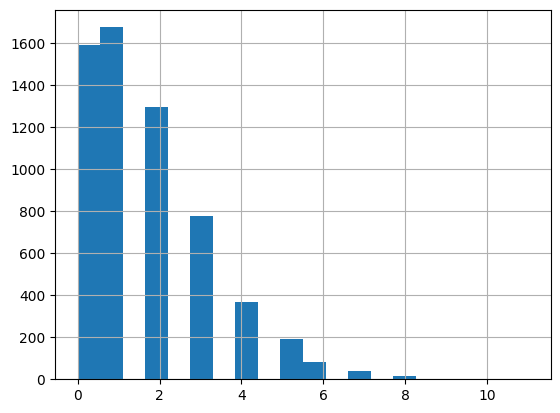

In [ ]:
overlap= []
num_rec = []
n = 20
for user in ratings.UserID.unique():
    top_items = model.topN(user=user, n=n)
    user_movies = ratings.loc[(ratings.UserID==user)].movieID
    valid_rec = set(top_items).intersection(set(user_movies)) # I can only measure by what was in the training data

    _ = len(set(ratings.loc[ratings.UserID==user].sort_values(by='Rating', ascending=False).head(n).movieID).intersection(set(valid_rec)))
    overlap.append(_)
    num_rec.append(len(valid_rec))

print('avg_perc_overlap:', np.array(overlap).mean() / np.array(num_rec).mean())
pd.Series(overlap).hist(bins=20)

Now Let's understand about another metric called **K-precision**

### What is K-precision?

- K-Precision is a metric used to evaluate the quality of recommendations provided by recommendation systems.
- It assesses how many of the top-K recommended items are relevant to the user's preferences.
- A higher K-Precision value indicates better recommendation quality.

<center><img src="https://drive.google.com/uc?id=1DO8xfPMTT61g1lgFVpYd0DRqeQZuue-I"></center>


avg: 0.8387403985241365


<Axes: >

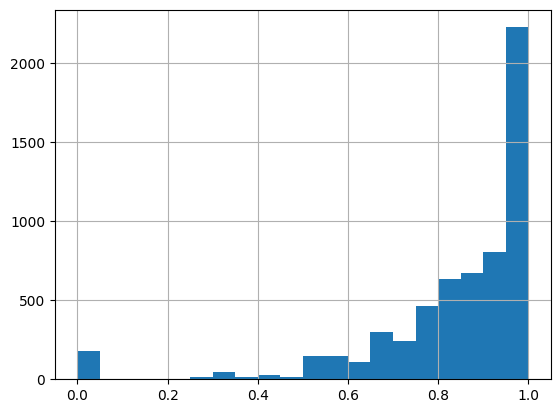

In [ ]:
overlap=[]
for user in ratings.UserID.unique():
    recommendations = model.topN(user=user, n=100)
    user_movies = ratings.loc[(ratings.UserID==user)].movieID
    valid_rec = set(recommendations).intersection(set(user_movies)) # I can only measure by what was in the training data
    relevant_items = ratings.loc[(ratings.UserID==user) & (ratings.Rating>=4)].movieID
    try:
        _ = len(set(recommendations).intersection(set(relevant_items))) / len(valid_rec)
    except:
        _ = 0
    overlap.append(_)

overlap = np.array(overlap)
print('avg:', overlap.mean())
pd.Series(overlap).hist(bins=20)

avg: 0.23716422719386934


<Axes: >

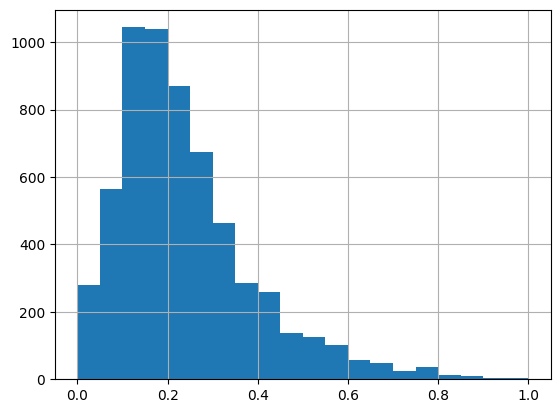

In [ ]:
overlap=[]
for user in ratings.UserID.unique():
    recommendations = model.topN(user=user, n=100)
    user_movies = ratings.loc[(ratings.UserID==user)].movieID
    valid_rec = set(recommendations).intersection(set(user_movies)) # I can only measure by what was in the training data
    relevant_items = ratings.loc[(ratings.UserID==user) & (ratings.Rating>=4)].movieID
    try:
        _ = len(set(recommendations).intersection(set(relevant_items))) / len(set(relevant_items))
    except:
        _ = 0
    overlap.append(_)

overlap = np.array(overlap)
print('avg:', overlap.mean())
pd.Series(overlap).hist(bins=20)

The above graph tell us that if we make, K predictions, we are able to find 23% of relevant predictions.

# **Questionnaire:**

Q: Users of which age group have watched and rated the most number of movies?

Ans: 25 to 35

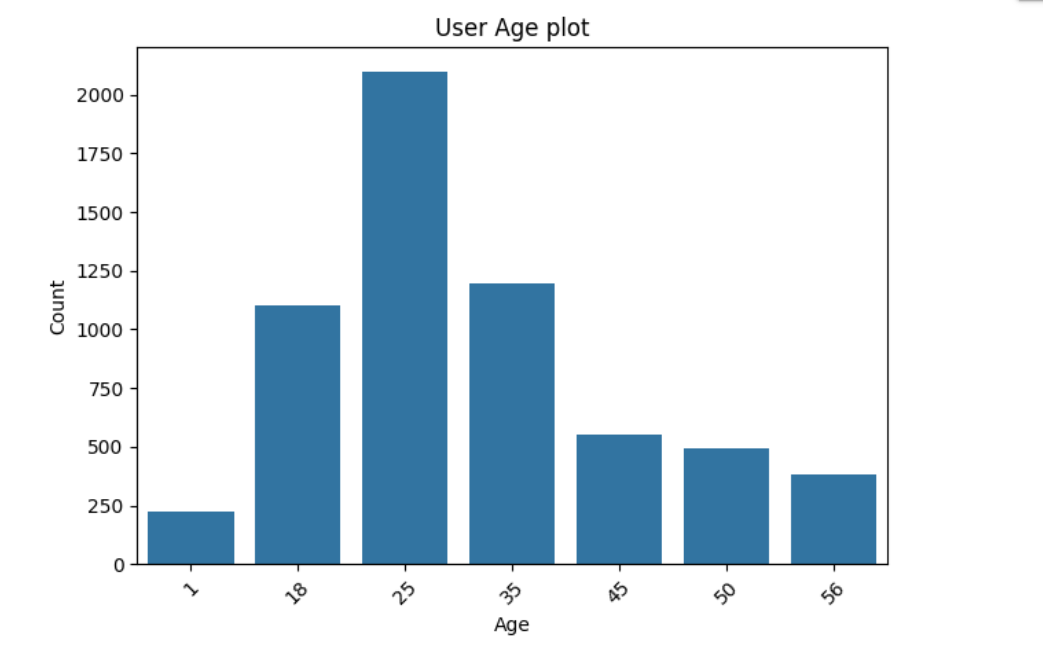

Q: Users belonging to which profession have watched and rated the most movies?

Ans: Occupation - 4

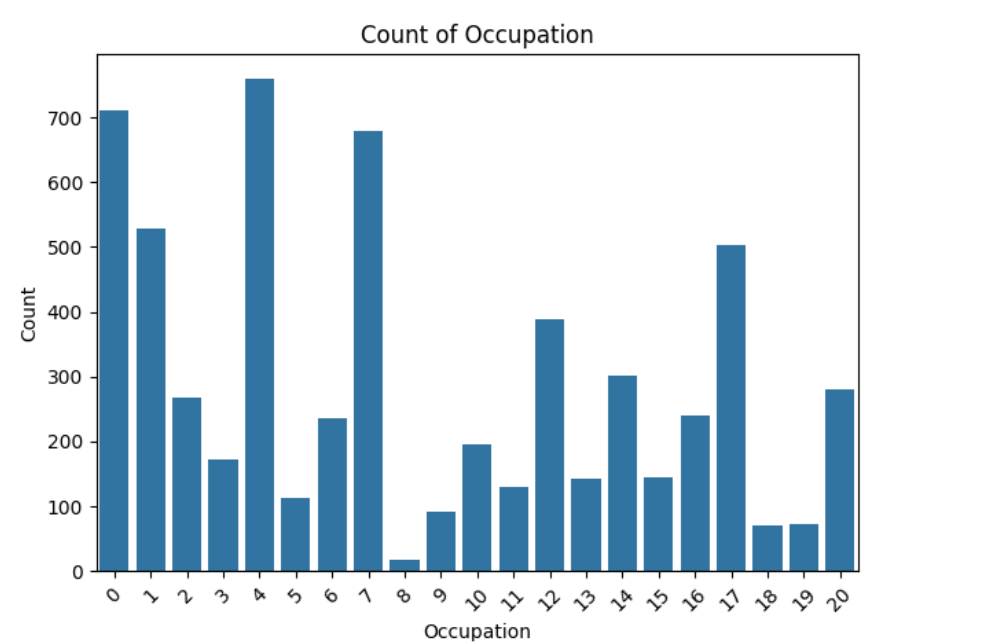

Q: Most of the movies present in our dataset were released in which decade?

a. 70s b. 90s c. 50s d.80s

Ans: 90s




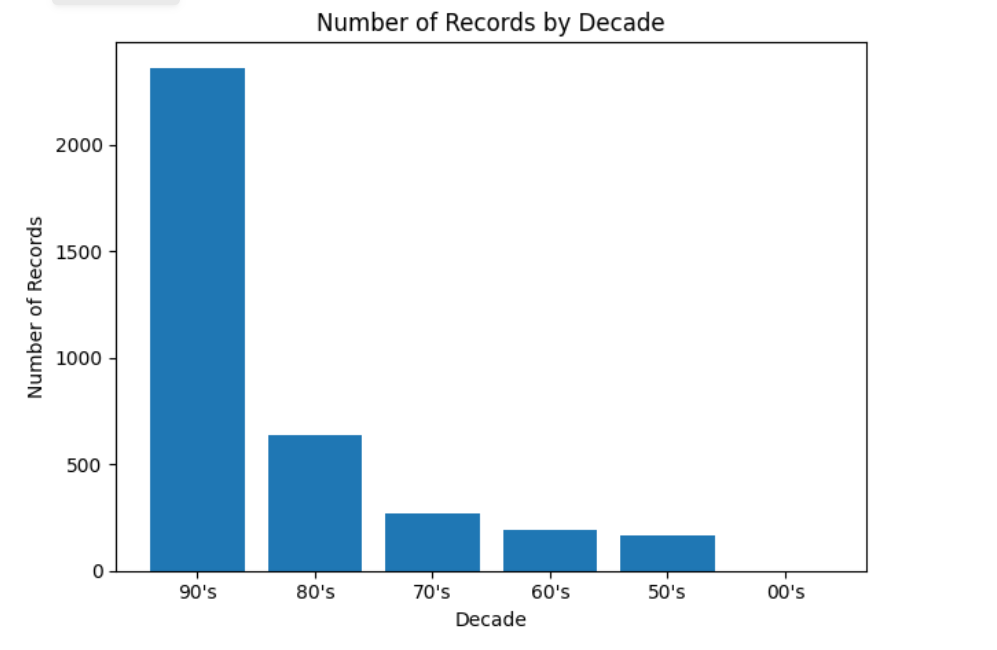

Q: The movie with maximum no. of ratings is ___.

In [ ]:

# Find the movie rated the most number of times
movie_rated_most = df_ratings['movieID'].mode()[0]  # Use mode() to find the most frequent movie ID

# Filter the DataFrame to show only the movie rated the most
most_rated_movie_df = df_ratings[df_ratings['movieID'] == movie_rated_most]

# Print the result (movie ID and number of ratings)
print(f"Movie ID: {movie_rated_most}")
print(f"Number of Ratings: {len(most_rated_movie_df)}")

Movie ID: 2858
Number of Ratings: 3428


Q: Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.


RMSE: 0.96

Q: Most of the users in our dataset who’ve rated the movies are Male. (T/F)

True




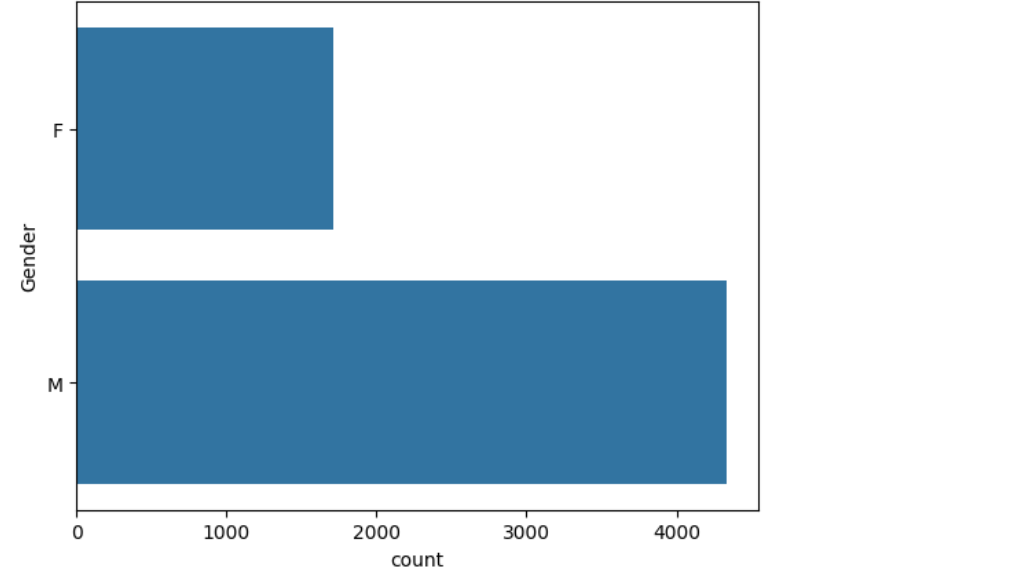


Q: On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.

a. item based

b. user based

Q: Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.


Pearson : -1 to 1
Cosine : 0 to 1

Q: Create the sparse ‘row’ matrix representation for the following dense matrix -

[[1 0]
[3 7]]


row | col | value
-----|-----|-----
0    | 0    | 1
1    | 1    | 7
3    | 0    | 3